In [1]:
# Import necessary packages
import requests
import pandas as pd
import re
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from yahoo_fin import stock_info as si

In [4]:
#create driver using FireFox Gecko
driver = webdriver.Firefox(executable_path=R'C:\Users\Zachary\Documents\GitHub\post_drafts\Random Assets\geckodriver.exe')

#set url for FFTY
url="https://www.zacks.com/funds/etf/FFTY/holding"
driver.get(url)

WebDriverException: Message: TypeError: this.curBrowser.contentBrowser is null


In [4]:
#scroll to the bottom to ensure dropdown list is not blocked
driver.execute_script("window.scrollTo(0, 400)") 

#select dropdown list to display all 50 holdings
ddelement= Select(driver.find_element_by_xpath('/html/body/div[5]/div[3]/div/section[2]/div/div/div[3]/div[2]/label/select'))
ddelement.select_by_visible_text('50')

#get ticker names
stock_list = [driver.find_element(By.CSS_SELECTOR, "#etf_holding_table > tbody:nth-child(2) > tr:nth-child({}) > td:nth-child(2) > a:nth-child(2) > span:nth-child(1)".format(i)).text for i in range(1,51)]

#get portfolio weights
weight_list = [driver.find_element(By.CSS_SELECTOR, "#etf_holding_table > tbody:nth-child(2) > tr:nth-child({}) > td:nth-child(4)".format(i)).text for i in range(1,51)]

#get prices
price_list = [round(si.get_live_price(i),2) for i in stock_list]

In [7]:
#create dataframe
df = pd.DataFrame(
    {   "Ticker" : stock_list,
        "Last" : price_list,
        "Weights" : weight_list
    }
)

df.to_csv("IBD50")

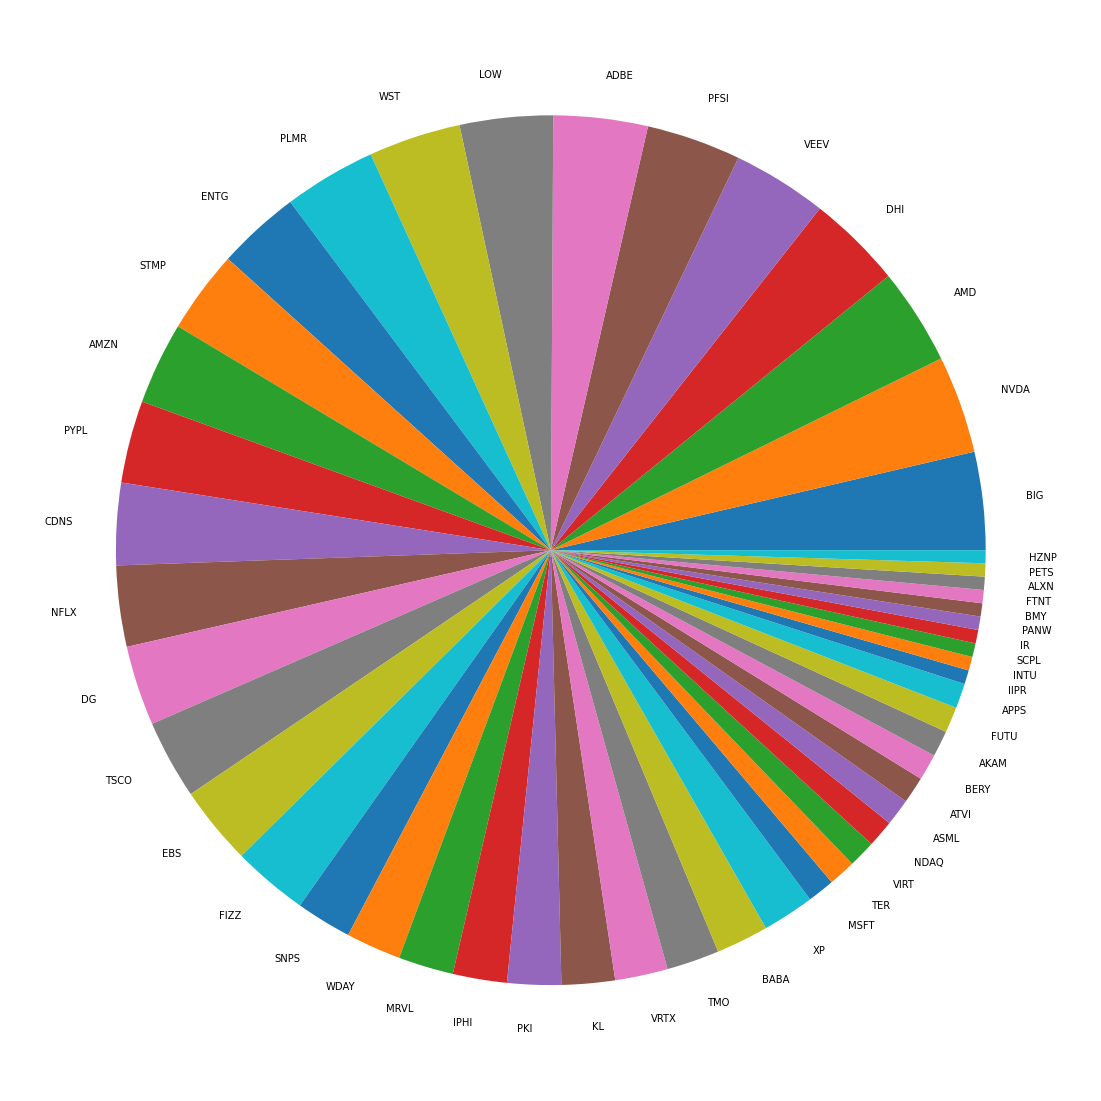

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.pie(df['Weights'], autopct=None, labels=df['Ticker'],
        shadow=False)
plt.show()